In [1]:
# HÜCRE 1: Google Drive Bağlantısı
from google.colab import drive
import os

drive.mount('/content/drive')

print("Drive bağlantısı başarılı!")

Mounted at /content/drive
Drive bağlantısı başarılı!


In [2]:
!pip install librosa numpy pandas matplotlib seaborn -q

In [3]:
# HÜCRE 2: Gerekli Kütüphaneler
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import random
import IPython.display as ipd

print("Kütüphaneler yüklendi ve import edildi.")

Kütüphaneler yüklendi ve import edildi.


In [4]:
# HÜCRE 3: Dosya Yolu ve İçerik Kontrolü

# Drive yapısına göre yol :
DATA_PATH = '/content/drive/MyDrive/Colab Notebooks/SER_Projesi/audio_speech_actors_01-24'

# Klasördeki tüm .wav dosyalarını buluyoruz
wav_files = []
for root, dirs, files in os.walk(DATA_PATH):
    for file in files:
        if file.endswith(".wav"):
            wav_files.append(os.path.join(root, file))

print(f" Hedef Klasör: {DATA_PATH}")
print(f" Bulunan Toplam Ses Dosyası: {len(wav_files)}")

if len(wav_files) == 1440:
    print(" MÜKEMMEL! Tüm veri seti (1440 dosya) eksiksiz tespit edildi.")
elif len(wav_files) > 0:
    print(f" Dosyalar bulundu ama sayı 1440 değil. ({len(wav_files)} adet). Devam edebiliriz.")
else:
    print(" HATA: Hiç dosya bulunamadı! DATA_PATH yolunu kontrol etmelisin.")

 Hedef Klasör: /content/drive/MyDrive/Colab Notebooks/SER_Projesi/audio_speech_actors_01-24
 Bulunan Toplam Ses Dosyası: 1440
 MÜKEMMEL! Tüm veri seti (1440 dosya) eksiksiz tespit edildi.


Seçilen Dosya: 03-01-05-02-02-01-02.wav
Duygu Kodu: 05

 Sesi Dinle:


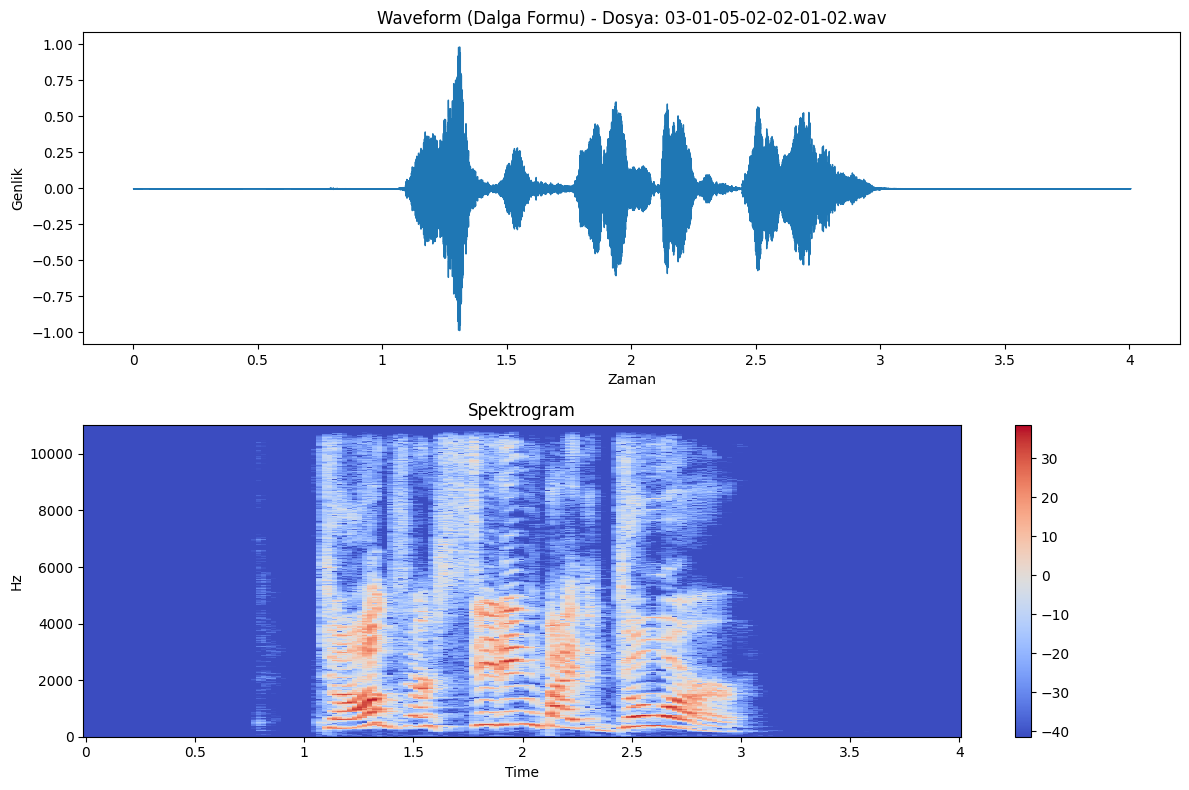

In [5]:
# HÜCRE 4: Rastgele Bir Sesi Görselleştirme
if len(wav_files) > 0:
    # 1. Rastgele dosya seç
    random_file = random.choice(wav_files)
    file_name = os.path.basename(random_file)
    print(f"Seçilen Dosya: {file_name}")

    # Dosya isminden duygu kodunu çözelim (Örn: 03-01-05...)
    # 3. parça duyguyu belirtir (01: nötr, 02: sakin, 03: mutlu, 04: üzgün...)
    emotion_code = file_name.split("-")[2]
    print(f"Duygu Kodu: {emotion_code}")

    # 2. Sesi Yükle
    data, sample_rate = librosa.load(random_file)

    # 3. Oynatıcıyı Göster
    print("\n Sesi Dinle:")
    ipd.display(ipd.Audio(data, rate=sample_rate))

    # 4. Grafikleri Çiz
    plt.figure(figsize=(12, 8))

    # A) Dalga Formu (Waveform) - Sesin şiddetini zamana göre gösterir
    plt.subplot(2, 1, 1)
    librosa.display.waveshow(data, sr=sample_rate)
    plt.title(f'Waveform (Dalga Formu) - Dosya: {file_name}')
    plt.xlabel('Zaman')
    plt.ylabel('Genlik')

    # B) Spektrogram - Sesin frekans yoğunluğunu gösterir (Model bunu görecek!)
    plt.subplot(2, 1, 2)
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='hz')
    plt.colorbar()
    plt.title('Spektrogram')

    plt.tight_layout()
    plt.show()
else:
    print("Görselleştirilecek dosya bulunamadı.")

/tmp/ipython-input-3679768213.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Emotions', data=df, palette='viridis')


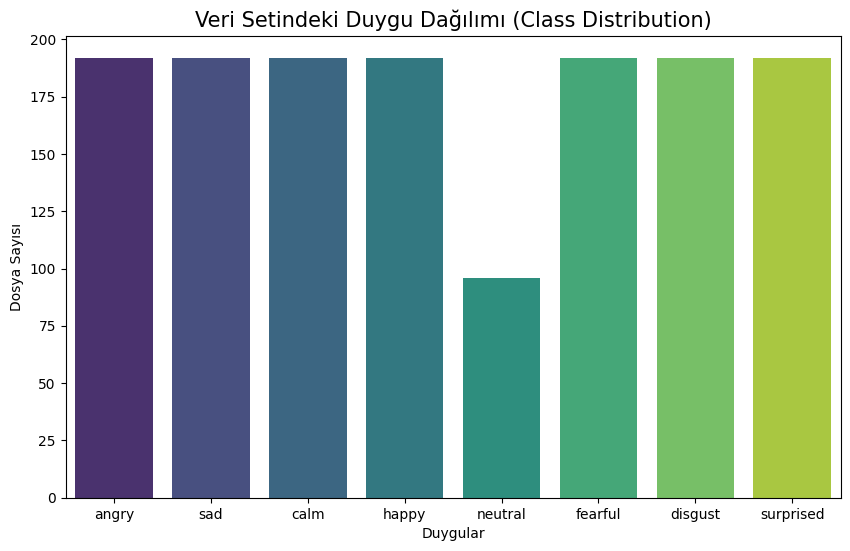

Grafikte çubuklar birbirine yakın yükseklikteyse veri dengelidir (Balanced).
Eğer biri çok azsa, model o duyguyu öğrenemez.


In [6]:
# HÜCRE 5: Duygu Dağılım Analizi
import pandas as pd
import seaborn as sns

# 1. Dosya isimlerinden duyguları ayrıştıralım
emotion_map = {
    '01': 'neutral',
    '02': 'calm',
    '03': 'happy',
    '04': 'sad',
    '05': 'angry',
    '06': 'fearful',
    '07': 'disgust',
    '08': 'surprised'
}

file_emotions = []
for file in wav_files:
    file_name = os.path.basename(file)
    part = file_name.split('-')[2]
    file_emotions.append(emotion_map.get(part, 'unknown'))

df = pd.DataFrame(file_emotions, columns=['Emotions'])

# 3. Grafiği Çiz
plt.figure(figsize=(10, 6))
sns.countplot(x='Emotions', data=df, palette='viridis')
plt.title('Veri Setindeki Duygu Dağılımı (Class Distribution)', fontsize=15)
plt.xlabel('Duygular')
plt.ylabel('Dosya Sayısı')
plt.show()

print("Grafikte çubuklar birbirine yakın yükseklikteyse veri dengelidir (Balanced).")
print("Eğer biri çok azsa, model o duyguyu öğrenemez.")

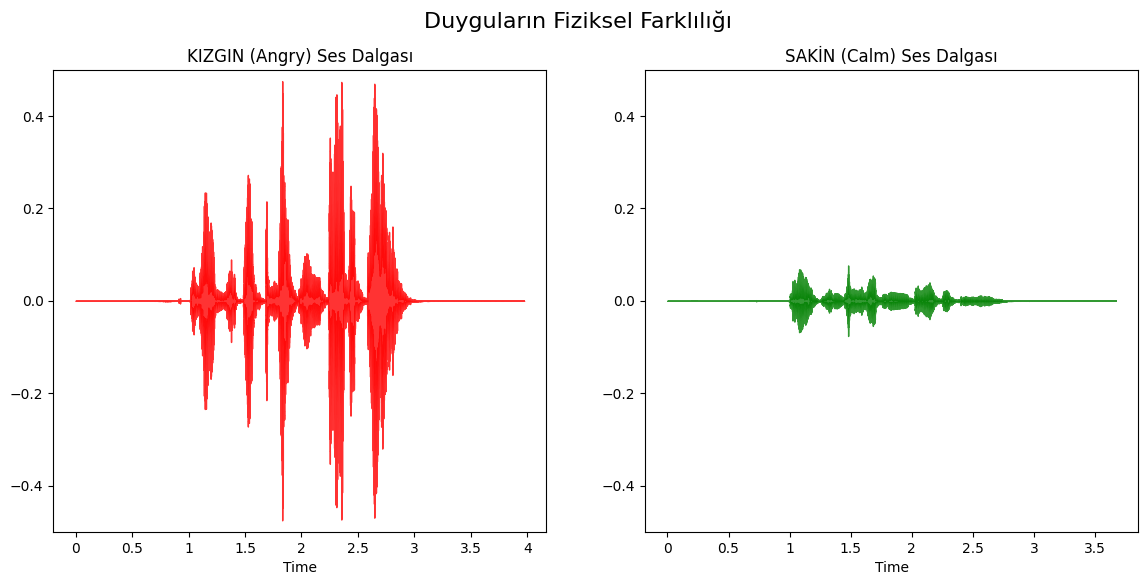

In [8]:
# HÜCRE 6: "Kızgın" ve "Sakin" Sesin Karşılaştırılması

def get_sample_by_emotion(emotion_code):
    # İstenen duygu koduna sahip ilk dosyayı bulur
    for file in wav_files:
        if os.path.basename(file).split('-')[2] == emotion_code:
            return file
    return None

# '05' -> Angry (Kızgın), '02' -> Calm (Sakin)
angry_file = get_sample_by_emotion('05')
calm_file = get_sample_by_emotion('02')

if angry_file and calm_file:
    # Sesleri yükle
    y_angry, sr = librosa.load(angry_file)
    y_calm, _ = librosa.load(calm_file)

    plt.figure(figsize=(14, 6))

    # Kızgın Ses
    plt.subplot(1, 2, 1)
    librosa.display.waveshow(y_angry, sr=sr, color='red', alpha=0.8)
    plt.title('KIZGIN (Angry) Ses Dalgası')
    plt.ylim(-0.5, 0.5) # Genlik sınırlarını sabitleyelim ki fark belli olsun

    # Sakin Ses
    plt.subplot(1, 2, 2)
    librosa.display.waveshow(y_calm, sr=sr, color='green', alpha=0.8)
    plt.title('SAKİN (Calm) Ses Dalgası')
    plt.ylim(-0.5, 0.5)

    plt.suptitle('Duyguların Fiziksel Farklılığı', fontsize=16)
    plt.show()
else:
    print("Dosyalar bulunamadı.")

Süreler hesaplanıyor, biraz bekletebilir...


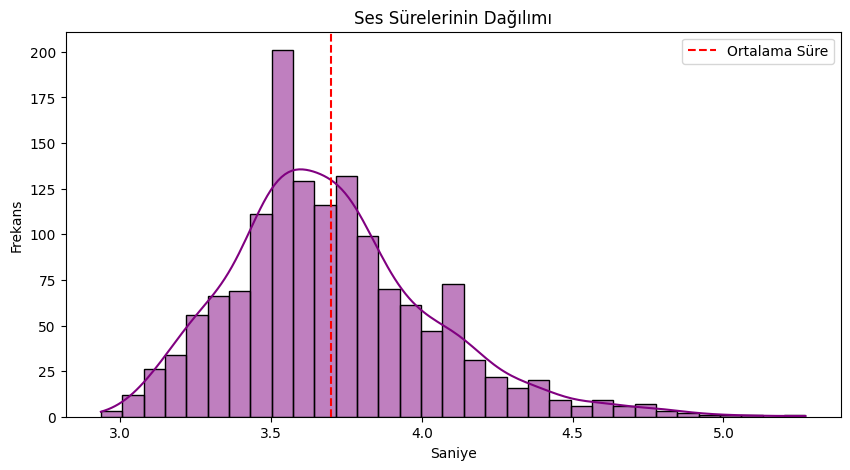

Ortalama Ses Süresi: 3.70 saniye


In [10]:
# HÜCRE 7: Ses Dosyalarının Süre Analizi

durations = []
print("Süreler hesaplanıyor, biraz bekletebilir...")
for file in wav_files[:1440]:
    y, sr = librosa.load(file, sr=None)
    durations.append(len(y) / sr)

plt.figure(figsize=(10, 5))
sns.histplot(durations, kde=True, color='purple')
plt.title('Ses Sürelerinin Dağılımı')
plt.xlabel('Saniye')
plt.ylabel('Frekans')
plt.axvline(np.mean(durations), color='red', linestyle='--', label='Ortalama Süre')
plt.legend()
plt.show()

print(f"Ortalama Ses Süresi: {np.mean(durations):.2f} saniye")